In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
# Precursor ion removed
df =  pd.read_csv("immunopeptide_prec_remY")

In [3]:
df_sorted = df.sort_values(by=['test-rmse-mean'], ascending=True)
df_sorted.head()

,Unnamed: 0,test-rmse-mean,nthread,objective,eval_metric,eta,max_depth,grow_policy,max_leaves,min_child_weight,gamma,reg_lambda,colsample_bytree,subsample,reg_alpha
0,0,0.895862,64,reg:squarederror,rmse,0.246381,18,lossguide,30,185,0.580670,0.520216,0.671758,0.9,4.7
24,24,0.902996,64,reg:squarederror,rmse,0.030594,17,lossguide,177,224,0.587474,0.957030,0.820465,0.7,2.7
23,23,0.904810,64,reg:squarederror,rmse,0.039111,15,lossguide,31,258,0.582428,0.963247,0.819370,0.8,2.0
19,19,0.914937,64,reg:squarederror,rmse,0.301775,14,lossguide,23,277,0.129246,0.024805,0.771176,0.8,1.9
16,16,0.919948,64,reg:squarederror,rmse,0.083352,11,lossguide,421,247,0.684176,0.523978,0.938035,0.9,3.1


In [13]:
params = {
    "nthread": df_sorted.iloc[0]["nthread"],
    "objective": df_sorted.iloc[0]["objective"],
    "eval_metric": df_sorted.iloc[0]["eval_metric"],
    "eta": df_sorted.iloc[0]["eta"],
    "max_depth": df_sorted.iloc[0]["max_depth"],
    "grow_policy": df_sorted.iloc[0]["grow_policy"],
    "max_leaves": df_sorted.iloc[0]["max_leaves"],
    "min_child_weight":  df_sorted.iloc[0]["min_child_weight"],
    "gamma":  df_sorted.iloc[0]["gamma"],
    "subsample":  df_sorted.iloc[0]["subsample"],
    "reg_lambda" : df_sorted.iloc[0]["reg_lambda"],
    "colsample_bytree": df_sorted.iloc[0]["colsample_bytree"],
    "reg_alpha" : df_sorted.iloc[0]["reg_alpha"]
}
params

{'nthread': 64,
 'objective': 'reg:squarederror',
 'eval_metric': 'rmse',
 'eta': 0.2463810001272822,
 'max_depth': 18,
 'grow_policy': 'lossguide',
 'max_leaves': 30,
 'min_child_weight': 185,
 'gamma': 0.5806703023989503,
 'subsample': 0.9,
 'reg_lambda': 0.5202158547927183,
 'colsample_bytree': 0.6717576535790775,
 'reg_alpha': 4.7}

<AxesSubplot:xlabel='subsample', ylabel='test-rmse-mean'>

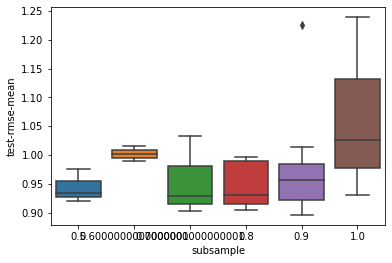

In [11]:
sns.boxplot(y="test-rmse-mean", x= "subsample", data=df_sorted)

<AxesSubplot:xlabel='max_depth', ylabel='test-rmse-mean'>

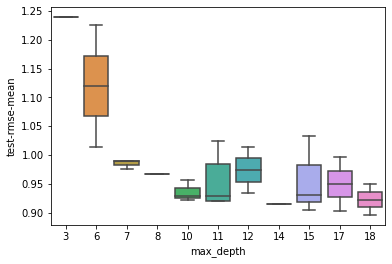

In [12]:
sns.boxplot(y="test-rmse-mean", x= "max_depth", data=df_sorted)

In [6]:
# Non processed
df2 =  pd.read_csv("immunopeptide_non_process_resultsY")

In [7]:
df2_sorted = df2.sort_values(by=['test-rmse-mean'], ascending=True)
df2_sorted.head()

,Unnamed: 0,test-rmse-mean,nthread,objective,eval_metric,eta,max_depth,grow_policy,max_leaves,min_child_weight,gamma,reg_lambda,colsample_bytree,subsample,reg_alpha
22,22,0.866974,64,reg:squarederror,rmse,0.138110,16,lossguide,416,309,0.118895,0.696150,0.777591,0.8,0.6
1,1,0.869923,64,reg:squarederror,rmse,0.141816,16,lossguide,344,279,0.327554,0.948333,0.930234,0.7,1.0
0,0,0.874224,64,reg:squarederror,rmse,0.136338,15,lossguide,391,319,0.357032,0.331302,0.739062,0.7,0.7
19,19,0.875698,64,reg:squarederror,rmse,0.053843,17,lossguide,335,266,0.412934,0.164793,0.540006,0.6,3.2
14,14,0.877119,64,reg:squarederror,rmse,0.208128,18,lossguide,96,79,0.795019,0.555780,0.827445,0.7,3.3


In [9]:
# Rank-TIC normalization
df3 =  pd.read_csv("immunopeptide_rankTIC_resultsY")

In [10]:
df3_sorted = df3.sort_values(by=['test-rmse-mean'], ascending=True)
df3_sorted.head()

,Unnamed: 0,test-rmse-mean,nthread,objective,eval_metric,eta,max_depth,grow_policy,max_leaves,min_child_weight,gamma,reg_lambda,colsample_bytree,subsample,reg_alpha
22,22,0.891611,64,reg:squarederror,rmse,0.120783,18,lossguide,11,319,0.554304,0.891904,0.715873,0.9,2.2
23,23,0.894207,64,reg:squarederror,rmse,0.116848,18,lossguide,14,348,0.264541,0.887540,0.764000,0.8,4.9
24,24,0.896078,64,reg:squarederror,rmse,0.107022,18,lossguide,6,370,0.301982,0.916125,0.770879,0.8,0.0
2,2,0.896153,64,reg:squarederror,rmse,0.189911,15,lossguide,134,222,0.046300,0.856137,0.663586,1.0,4.8
0,0,0.898189,64,reg:squarederror,rmse,0.175151,14,lossguide,429,215,0.551530,0.641044,0.702062,1.0,2.3


In [16]:
print("The minimum test rmse for non processed data is", df2_sorted.iloc[0]["test-rmse-mean"], "\nFor the data with precursor ion removed",df_sorted.iloc[0]["test-rmse-mean"], "\nFor the data with rank TIC normalization is", df3_sorted.iloc[0]["test-rmse-mean"])

The minimum test rmse for non processed data is 0.86697375 
For the data with precursor ion removed 0.895862 
For the data with rank TIC normalization is 0.8916112500000001
